In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
sns.set()
sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})
plt.rcParams['figure.figsize'] = [8, 6]

### N50 and N(x) curve 

In [71]:
def contigs_lenghts(fasta_file):
    """Extract contig lengths from fasta file of a bin
    
    Input: fasta file for a bin
    
    Output: list of contig lengths
    """
    lengths = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        lengths.append(len(record.seq))
    return(np.array(lengths))


def nx_curve(lengths):
    """Function for calculation of N(x)
    generalization of N50 statistic
    
    Input: list of lengths of contigs in a bin
    
    Outputs:
    Nx - np.array of x values (thrsholds (0.5 in case of N50))
    Nx_len - np.array of N(x) lengths"""

    sorted_lengths = sorted(lengths, reverse=True)
    csum=np.cumsum(sorted_lengths)

    Nx = np.array(range(1,101))/100
    Nx_len = []
    for n in Nx:
        x = csum[-1]*n

        for i in range(len(sorted_lengths)):
            if csum[i] >= x:
                Nx_len.append(sorted_lengths[i])
                break
                
    return(Nx,np.array(Nx_len))

In [72]:
bins = []
for i in [1,2,3]:
    name = "./test/bin."+str(i)+".fa"
    lengths = []
    for record in SeqIO.parse(name, "fasta"):
        lengths.append(len(record.seq))

    Nx, Nx_len = nx_curve(lengths)
    Nx_norm = Nx_len/max(Nx_len)
    
    bins.append(Nx_norm)


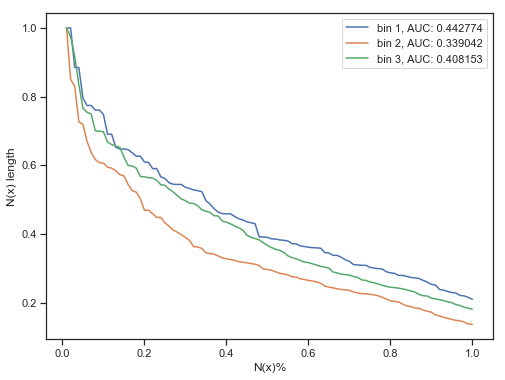

In [73]:
plt.plot(Nx,bins[0], label="bin 1, AUC: %f" % np.trapz(bins[0], Nx))
plt.plot(Nx,bins[1], label="bin 2, AUC: %f" % np.trapz(bins[1], Nx))
plt.plot(Nx,bins[2], label="bin 3, AUC: %f" % np.trapz(bins[2], Nx))

plt.xlabel("N(x)%")
plt.ylabel("N(x) length")
plt.legend()
#plt.yscale('log')
plt.show()

### Differnece in N(x) between bins and genomes

In [74]:
def plot_bin_genome_Nx(bin_nx,bin_norm,genome_nx,genome_norm):
    plt.plot(bin_nx,bin_norm, label="bin, AUC: %f" % np.trapz(bin_norm, bin_nx))
    plt.plot(genome_nx,genome_norm, label="genome, AUC: %f" % np.trapz(genome_norm, genome_nx))
    plt.xlabel("N(x)%")
    plt.ylabel("N(x) length")
    plt.fill_between(bin_nx, bin_norm, genome_norm, alpha = 0.2, label="Area: %f" % np.trapz(genome_norm-bin_norm, genome_nx))
    #plt.yscale('log')
    plt.legend()
    plt.show()

In [87]:
bins = contigs_lenghts("./test/bin.3.fa")
genome = contigs_lenghts("./genomes/genome3/final.contigs.fa")

bin_nx, bin_len = nx_curve(bins)
genome_nx, genome_len = nx_curve(genome)

bin_norm = bin_len/max(bin_len)
genome_norm = genome_len/max(genome_len)

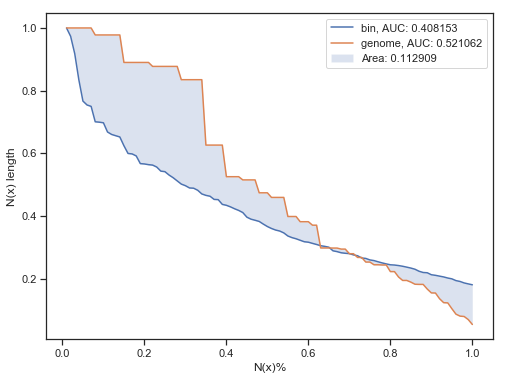

In [88]:
plot_bin_genome_Nx(bin_nx,bin_norm,genome_nx,genome_norm)

### Number of assembled nucleotides in contigs above length l

In [105]:
def n_contigs_L(lengths, l):
    """Number of assembled nucleotides in contigs above length l
    
    Inputs: 
    lengths - np.array of contig lengths 
    l - lenght threshold
    """
    idx = genome > l
    return lengths[idx].sum()


def n_contigs_curve(lengths):
    """Number of assembled nucleotides in contigs above length l
    calculated for set of l values
    
    Inputs: 
    lengths - np.array of contig lengths 
    """
    max_len = max(genome)
    x = np.linspace(1,max_len, 20)
    
    nucleotides_x = []

    for i in range(len(x)):
        idx = genome > x[i]
        nucleotides_x.append(genome[idx].sum())

    return 
    

In [103]:
genome = contigs_lenghts("./genomes/genome3/final.contigs.fa")
total = sum(genome)
max_len = max(genome)

x = np.linspace(1,max_len, 20)

nucleotides_x = []

for i in range(len(x)):

    idx = genome > x[i]
    nucleotides_x.append(genome[idx].sum())

nucleotides_x = np.array(nucleotides_x)
nucleotides_norm = nucleotides_x/total

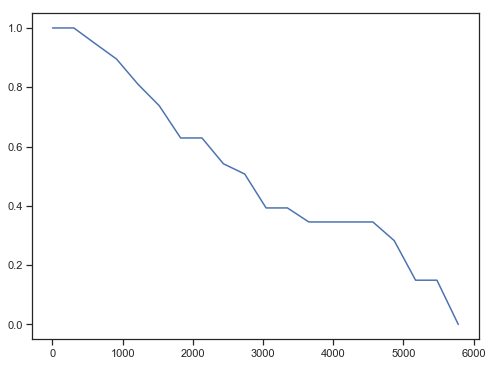

In [104]:
plt.plot(x, nucleotides_norm)